# Introducción

En el desafío Alura Store, análisis de ventas y rendimiento de las tiendas, el objetivo es ayudar al señor Juan a decidir qué tienda debe vender para invertir en un nuevo negocio. Para ello, evaluaré cuál de las cuatro tiendas tiene un desempeño menor, permitiendo al señor Juan tomar la mejor decisión de cuál sucursal debe vender para invertir en un nuevo negocio. Esta desición debe de estar bastante informada.

### Importación de datos



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

Vamos a sumar los valores de la columna Precio de cada tienda y descubriremos cuál está facturando más.

In [3]:
facturacion_tienda1 = tienda1['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

print("Facturación total por tienda:")
print(f"Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4: ${facturacion_tienda4:,.2f}")


Facturación total por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


1.1 Gráfico de pastel - % Facturación total por tienda

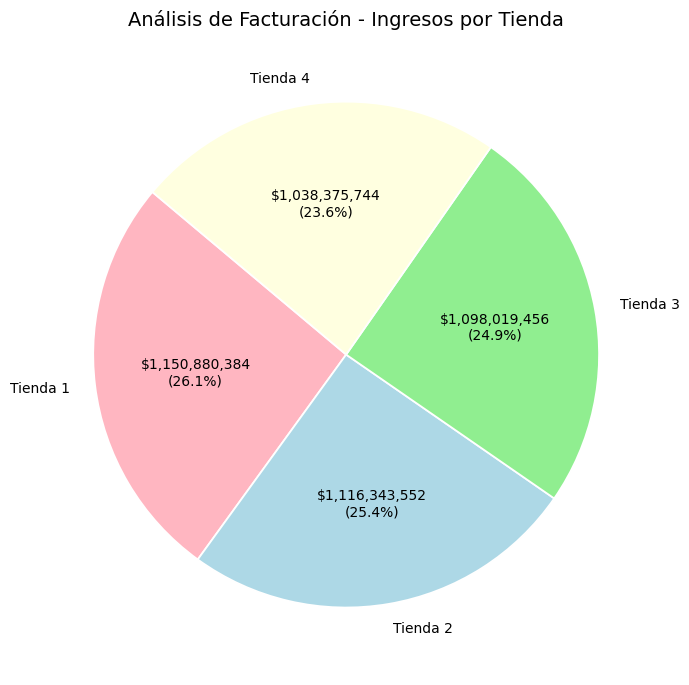

In [7]:
import seaborn as sns

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Función para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
import seaborn as sns
import matplotlib.pyplot as plt

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Función para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
# Crear gráfico
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct=lambda pct: formato_monto(pct, sizes), startangle=140, colors= ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow'], shadow=False, wedgeprops={'edgecolor': 'white', 'linewidth': 1.3})

plt.title('Análisis de Facturación - Ingresos por Tienda', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()



Otra opción de calcular la facturación por tienda

In [5]:
#función para contar productos por PRECIO y conviertiendolo a Df
def ingresos_precios(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Ingreso Total' : [suma_tiendas]})

#aplicar a la funcion por cada tienda
c1 = ingresos_precios(tienda1, 'Tienda 1')
c2 = ingresos_precios(tienda2, 'Tienda 2')
c3 = ingresos_precios(tienda3, 'Tienda 3')
c4 = ingresos_precios(tienda4, 'Tienda 4')

#uniendo todo para gráficar
total_suma = pd.concat([c1, c2, c3, c4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
total_suma

,Tienda,Conteo,Ingreso Total
0,Tienda 1,2359,"1,150,880,400.00"
1,Tienda 2,2359,"1,116,343,500.00"
2,Tienda 3,2359,"1,098,019,600.00"
3,Tienda 4,2358,"1,038,375,700.00"


 1.2. Gráfico de barras – Facturación total por tienda

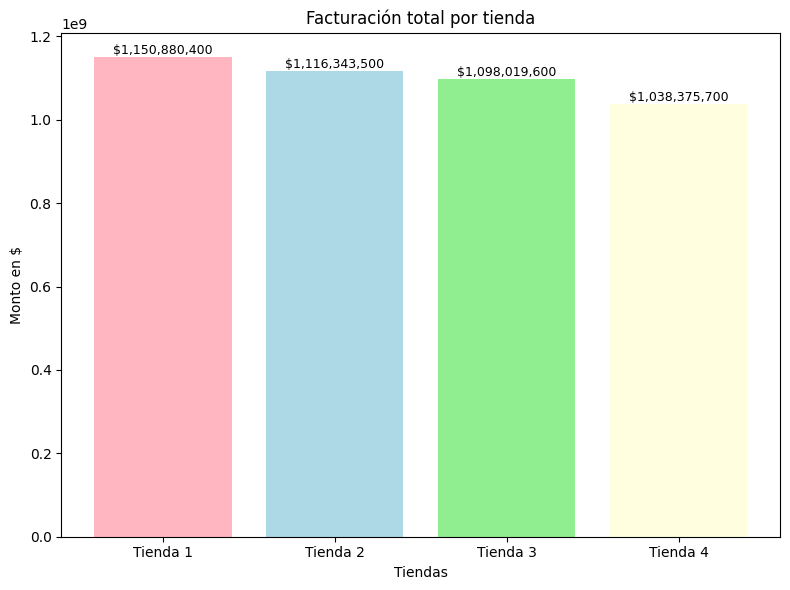

In [8]:
# Datos de facturación
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [
    tienda1['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

# Gráfico
plt.figure(figsize=(8,6))
plt.bar(tiendas, facturacion, color= ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow'])
plt.title('Facturación total por tienda')
plt.ylabel('Monto en $')
plt.xlabel('Tiendas')
plt.tight_layout()

for i, valor in enumerate(facturacion):
    plt.text(i, valor + 50, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)
plt.show()

# 2. Ventas por categoría

¡Es momento de descubrir qué categorías de productos se venden más en cada tienda!
En este paso, vamos a agrupar los datos por categoría y contar cuántas ventas hubo de cada tipo. Esto nos permitirá identificar las categorías más populares por tienda.

In [9]:
categorias_tienda1 = tienda1['Categoría del Producto'].value_counts()
categorias_tienda2 = tienda2['Categoría del Producto'].value_counts()
categorias_tienda3 = tienda3['Categoría del Producto'].value_counts()
categorias_tienda4 = tienda4['Categoría del Producto'].value_counts()

print("Categorías más populares por tienda:")

print("Tienda 1:")
print(categorias_tienda1, '\n')

print("Tienda 2:")
print(categorias_tienda2, '\n')

print("Tienda 3:")
print(categorias_tienda3, '\n')

print("Tienda 4:")
print(categorias_tienda4, '\n')

#"Name: count": indica que la Series tiene el nombre "count", porque value_counts() internamente usa ese nombre.
#"dtype: int64": indica que los valores son enteros de 64 bits (es decir, conteos de frecuencia).

Categorías más populares por tienda:
Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64 

Tienda 4:
Categoría del Producto
Mue

 Vamos a organizar la salida del Paso 2 en forma de DataFrame para que sea más clara y presentable.

In [10]:
# Función para crear DataFrame limpio de categorías más vendidas
def categorias_mas_vendidas(df, nombre_tienda):
    categorias = df['Categoría del Producto'].value_counts().reset_index()
    categorias.columns = ['Categoría del producto', 'Cantidad de ventas']
    print(f"\n{nombre_tienda.upper()} - Categorías más vendidas:\n")
    print(categorias)

# Mostrar resultados
categorias_mas_vendidas(tienda1, "Tienda 1")
categorias_mas_vendidas(tienda2, "Tienda 2")
categorias_mas_vendidas(tienda3, "Tienda 3")
categorias_mas_vendidas(tienda4, "Tienda 4")



TIENDA 1 - Categorías más vendidas:

    Categoría del producto  Cantidad de ventas
0                  Muebles                 465
1             Electrónicos                 448
2                 Juguetes                 324
3        Electrodomésticos                 312
4     Deportes y diversión                 284
5   Instrumentos musicales                 182
6                   Libros                 173
7  Artículos para el hogar                 171

TIENDA 2 - Categorías más vendidas:

    Categoría del producto  Cantidad de ventas
0                  Muebles                 442
1             Electrónicos                 422
2                 Juguetes                 313
3        Electrodomésticos                 305
4     Deportes y diversión                 275
5   Instrumentos musicales                 224
6                   Libros                 197
7  Artículos para el hogar                 181

TIENDA 3 - Categorías más vendidas:

    Categoría del producto  Cantidad de 

2.1. Gráfico de barras apiladas– Categorías más vendidas en las tiendas

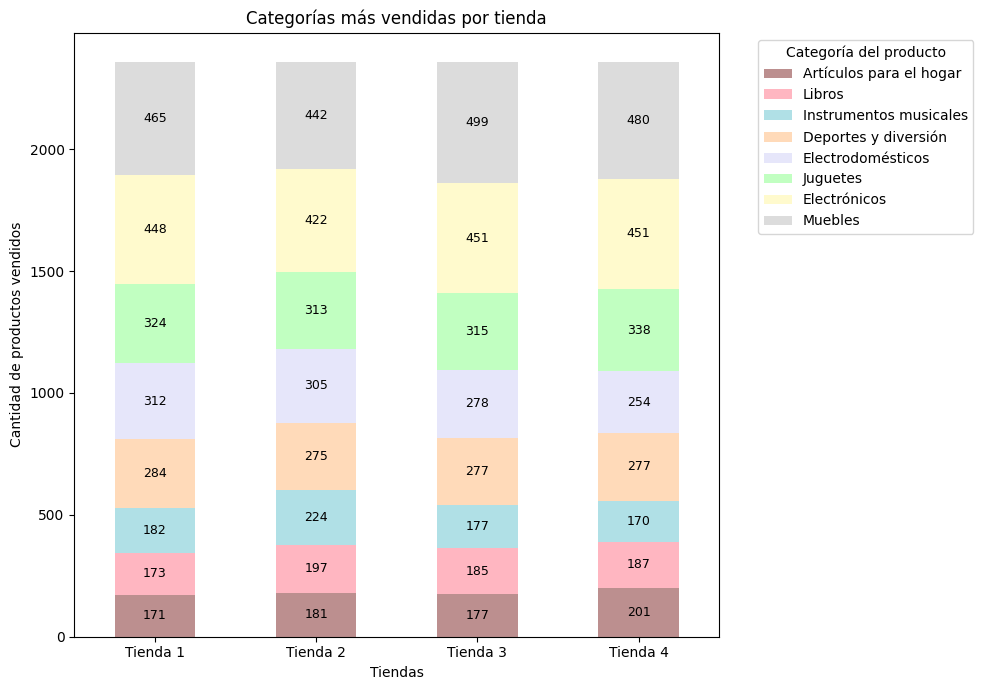

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar categorías por tienda
cat1 = tienda1['Categoría del Producto'].value_counts()
cat2 = tienda2['Categoría del Producto'].value_counts()
cat3 = tienda3['Categoría del Producto'].value_counts()
cat4 = tienda4['Categoría del Producto'].value_counts()

# Unificar en un solo DataFrame
df_categorias = pd.DataFrame({
    'Tienda 1': cat1,
    'Tienda 2': cat2,
    'Tienda 3': cat3,
    'Tienda 4': cat4
}).fillna(0)

# Reordenar para que las categorías estén como columnas
df_categorias = df_categorias.T  # Tiendas como filas

# Ordenar columnas (categorías) por suma total ascendente
orden_columnas = df_categorias.sum(axis=0).sort_values().index
df_categorias = df_categorias[orden_columnas]  # Ordenar columnas

# Colores pastel
pastel_colors = ['#BC8F8F', '#FFB6C1', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#C1FFC1', '#FFFACD', '#DCDCDC']

# Gráfico de columnas apiladas
ax = df_categorias.plot(kind='bar', stacked=True, figsize=(10, 7), color=pastel_colors)

plt.title("Categorías más vendidas por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad de productos vendidos")
plt.legend(title='Categoría del producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Agregar etiquetas con cantidades en cada bloque
for i, tienda in enumerate(df_categorias.index):
    y_offset = 0
    for j, valor in enumerate(df_categorias.loc[tienda]):
        if valor > 0:
            plt.text(i, y_offset + valor / 2, int(valor), ha='center', va='center', fontsize=9)
            y_offset += valor

plt.show()


In [12]:
ingresos_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
ingresos_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ingresos_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ingresos_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

print("Ingresos por categoría por tienda: \n")
print(f"Tienda 1: ${ingresos_por_categoria_tienda1}\n")
print(f"Tienda 2: ${ingresos_por_categoria_tienda2}\n")
print(f"Tienda 3: ${ingresos_por_categoria_tienda3}\n")
print(f"Tienda 4: ${ingresos_por_categoria_tienda4}\n")

Ingresos por categoría por tienda: 

Tienda 1: $Categoría del Producto
Artículos para el hogar    12,698,400.00
Deportes y diversión       39,290,000.00
Electrodomésticos         363,685,200.00
Electrónicos              429,493,500.00
Instrumentos musicales     91,299,000.00
Juguetes                   17,995,700.00
Libros                      8,784,900.00
Muebles                   187,633,700.00
Name: Precio, dtype: float64

Tienda 2: $Categoría del Producto
Artículos para el hogar    14,746,900.00
Deportes y diversión       34,744,500.00
Electrodomésticos         348,567,800.00
Electrónicos              410,831,100.00
Instrumentos musicales    104,990,300.00
Juguetes                   15,945,400.00
Libros                     10,091,200.00
Muebles                   176,426,300.00
Name: Precio, dtype: float64

Tienda 3: $Categoría del Producto
Artículos para el hogar    15,060,000.00
Deportes y diversión       35,593,100.00
Electrodomésticos         329,237,900.00
Electrónicos          

2.2. Gráfico de barras apiladas– Categorías más vendidas en las tiendas ($)

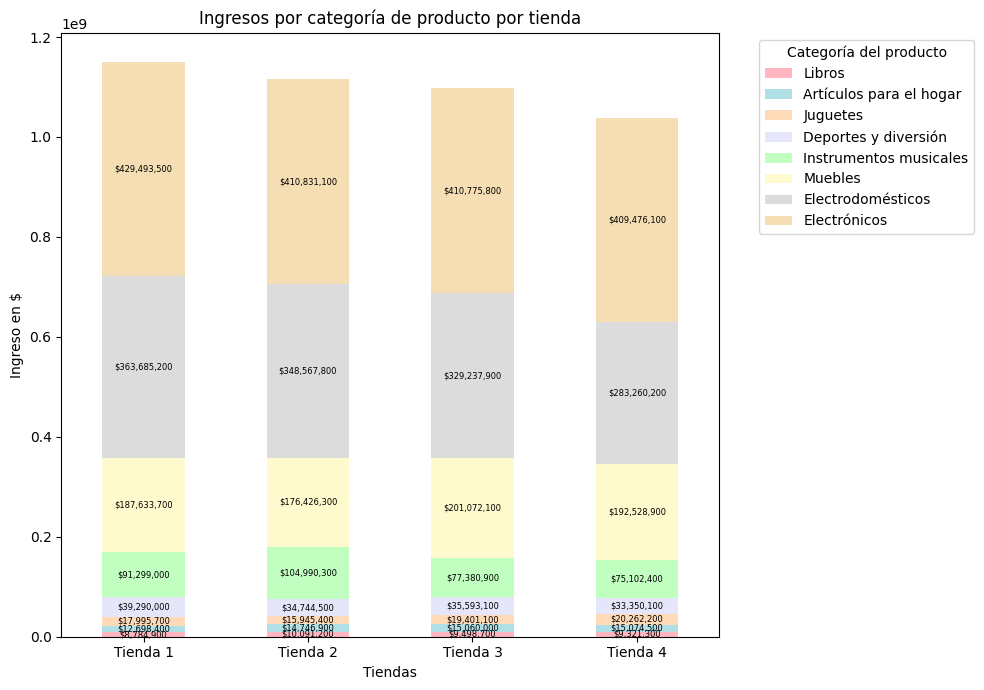

In [13]:

# Calcular ingresos por categoría por tienda

ingresos_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
ingresos_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ingresos_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ingresos_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

# Unir en un DataFrame
df_ingresos = pd.DataFrame({
    'Tienda 1': ingresos_por_categoria_tienda1,
    'Tienda 2': ingresos_por_categoria_tienda2,
    'Tienda 3': ingresos_por_categoria_tienda3,
    'Tienda 4': ingresos_por_categoria_tienda4
}).fillna(0).T  # Tiendas como filas

# Ordenar categorías por ingresos totales (suma de todas las tiendas)
orden_categorias = df_ingresos.sum(axis=0).sort_values().index
df_ingresos = df_ingresos[orden_categorias]

# Definir colores pastel
pastel_colors = ['#FFB6C1', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#C1FFC1', '#FFFACD', '#DCDCDC', '#F5DEB3']
pastel_colors = pastel_colors[:len(df_ingresos.columns)]

# Crear gráfico apilado
ax = df_ingresos.plot(kind='bar', stacked=True, figsize=(10, 7), color=pastel_colors)

# Títulos y etiquetas
plt.title("Ingresos por categoría de producto por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingreso en $")
plt.xticks(rotation=0)
plt.legend(title="Categoría del producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Agregar etiquetas con montos en cada bloque
for i, tienda in enumerate(df_ingresos.index):
    y_offset = 0
    for j, valor in enumerate(df_ingresos.loc[tienda]):
        if valor > 0:
            plt.text(i, y_offset + valor / 2, f"${valor:,.0f}", ha='center', va='center', fontsize=6)
            y_offset += valor

plt.show()


# 3. Calificación promedio de la tienda


In [14]:
eval_prom_tienda1 = tienda1['Calificación'].mean()
eval_prom_tienda2 = tienda2['Calificación'].mean()
eval_prom_tienda3 = tienda3['Calificación'].mean()
eval_prom_tienda4 = tienda4['Calificación'].mean()

print("Evaluación promedio por tienda:")
print(f"Tienda 1: {eval_prom_tienda1:.2f}")
print(f"Tienda 2: {eval_prom_tienda2:.2f}")
print(f"Tienda 3: {eval_prom_tienda3:.2f}")
print(f"Tienda 4: {eval_prom_tienda4:.2f}")


Evaluación promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


3.1. Gráfico de líneas – Evaluación promedio de clientes por tienda

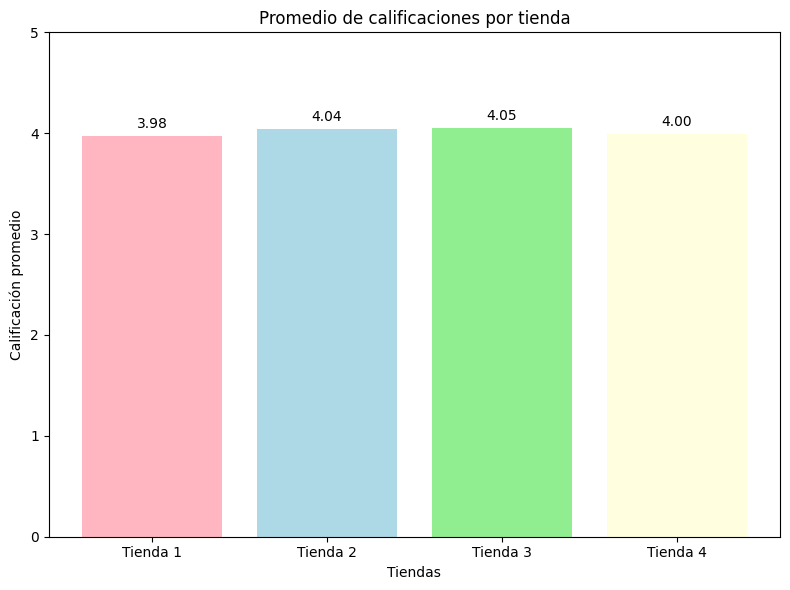

In [15]:

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
evaluaciones = [
    tienda1['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

# Crear gráfico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(tiendas, evaluaciones, color=['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow'])

# Títulos y etiquetas
plt.title('Promedio de calificaciones por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación promedio')
plt.ylim(0, 5)  # Rango típico de calificación

# Agregar etiquetas de valor encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [16]:
# Función para mostrar el producto más y menos vendido
def productos_extremos(df, nombre_tienda):
    productos = df['Producto'].value_counts()
    mas_vendido = productos.idxmax()
    menos_vendido = productos.idxmin()
    print(f"\n{nombre_tienda.upper()}:\n")
    print(f"📈 Producto más vendido: {mas_vendido} ({productos.max()} ventas)")
    print(f"📉 Producto menos vendido: {menos_vendido} ({productos.min()} venta(s))")

# Ejecutar para cada tienda
productos_extremos(tienda1, "Tienda 1")
productos_extremos(tienda2, "Tienda 2")
productos_extremos(tienda3, "Tienda 3")
productos_extremos(tienda4, "Tienda 4")



TIENDA 1:

📈 Producto más vendido: Microondas (60 ventas)
📉 Producto menos vendido: Auriculares con micrófono (33 venta(s))

TIENDA 2:

📈 Producto más vendido: Iniciando en programación (65 ventas)
📉 Producto menos vendido: Juego de mesa (32 venta(s))

TIENDA 3:

📈 Producto más vendido: Kit de bancas (57 ventas)
📉 Producto menos vendido: Bloques de construcción (35 venta(s))

TIENDA 4:

📈 Producto más vendido: Cama box (62 ventas)
📉 Producto menos vendido: Guitarra eléctrica (33 venta(s))


# 5. Envío promedio por tienda

In [17]:
# Costo de envío promedio por tienda
envio_prom_tienda1 = tienda1['Costo de envío'].mean()
envio_prom_tienda2 = tienda2['Costo de envío'].mean()
envio_prom_tienda3 = tienda3['Costo de envío'].mean()
envio_prom_tienda4 = tienda4['Costo de envío'].mean()

# Mostrar resultados
print("Costo promedio de envío por tienda:")
print(f"Tienda 1: ${envio_prom_tienda1:.2f}")
print(f"Tienda 2: ${envio_prom_tienda2:.2f}")
print(f"Tienda 3: ${envio_prom_tienda3:.2f}")
print(f"Tienda 4: ${envio_prom_tienda4:.2f}")


Costo promedio de envío por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


5.1. Gráfico del costo promedio enviado por tienda

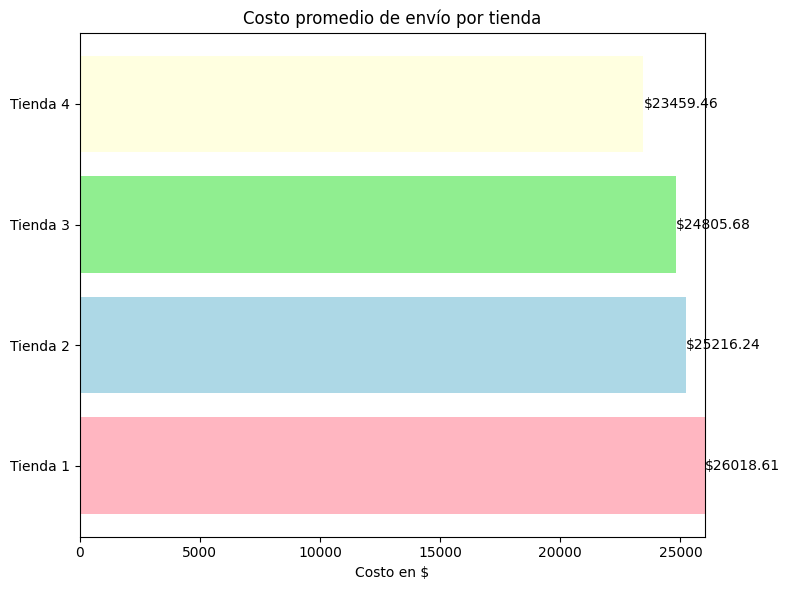

In [18]:

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios_promedio = [envio_prom_tienda1, envio_prom_tienda2, envio_prom_tienda3, envio_prom_tienda4]
colores = ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow']  # Tonos pastel

# Gráfico
plt.figure(figsize=(8,6))
bars = plt.barh(tiendas, envios_promedio, color=colores)

# Agregar etiquetas en las barras
for bar in bars:
    ancho = bar.get_width()
    plt.text(ancho + 0.2, bar.get_y() + bar.get_height()/2,
             f"${ancho:.2f}", va='center', fontsize=10)

# Títulos y etiquetas
plt.title("Costo promedio de envío por tienda")
plt.xlabel("Costo en $")
plt.xlim(0, max(envios_promedio) + 5)
plt.tight_layout()
plt.show()


# Rentabilidad de cada tienda

In [19]:
# Paso 1: Calcular ingresos totales por tienda (sumando los precios)
ingresos_t1 = tienda1['Precio'].sum()
ingresos_t2 = tienda2['Precio'].sum()
ingresos_t3 = tienda3['Precio'].sum()
ingresos_t4 = tienda4['Precio'].sum()

# Paso 2: Calcular costos de envío totales
envio_t1 = tienda1['Costo de envío'].sum()
envio_t2 = tienda2['Costo de envío'].sum()
envio_t3 = tienda3['Costo de envío'].sum()
envio_t4 = tienda4['Costo de envío'].sum()

# Paso 3: Calcular rentabilidad
rentabilidad_t1 = ingresos_t1 - envio_t1
rentabilidad_t2 = ingresos_t2 - envio_t2
rentabilidad_t3 = ingresos_t3 - envio_t3
rentabilidad_t4 = ingresos_t4 - envio_t4

# Paso 4: Mostrar resultados
print("Rentabilidad por tienda (ingresos - costo de envío):\n")
print(f"Tienda 1: ${rentabilidad_t1:,.2f}")
print(f"Tienda 2: ${rentabilidad_t2:,.2f}")
print(f"Tienda 3: ${rentabilidad_t3:,.2f}")
print(f"Tienda 4: ${rentabilidad_t4:,.2f}")


Rentabilidad por tienda (ingresos - costo de envío):

Tienda 1: $1,089,502,500.00
Tienda 2: $1,056,858,400.00
Tienda 3: $1,039,503,000.00
Tienda 4: $983,058,300.00


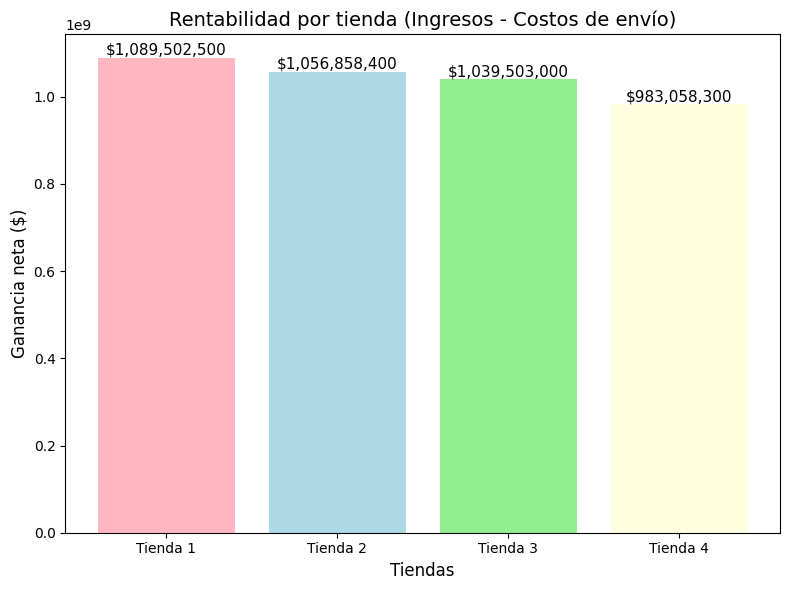

In [21]:


# Datos de rentabilidad
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
rentabilidades = [rentabilidad_t1, rentabilidad_t2, rentabilidad_t3, rentabilidad_t4]

# Crear gráfico
plt.figure(figsize=(8, 6))
colores = ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow']  # Tonos pastel

barras = plt.bar(tiendas, rentabilidades, color=colores)

# Etiquetas
plt.title('Rentabilidad por tienda (Ingresos - Costos de envío)', fontsize=14)
plt.ylabel('Ganancia neta ($)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.xticks(rotation=0)

# Mostrar valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 50, f"${altura:,.0f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


#Conclusión


🧾 Conclusión Final: ¿Qué tienda vender?
🛑 Tienda 4 es la que presenta el peor rendimiento general, por las siguientes razones clave:

Menor facturación total, lo que indica pocas ventas.

Rentabilidad más baja, ya que sus ingresos apenas cubren los costos de envío.

Poca diversidad en productos y categorías más vendidas, lo que limita su potencial de crecimiento.

Aunque su calificación no es la más baja, no compensa sus otras debilidades.

✅ Recomendación:
📉 Vender la Tienda 4 es la mejor opción, ya que tiene el menor rendimiento global y ofrece menos oportunidades de optimización en comparación con las demás.